# Modelo de clasificación: Regresión Logística

En este notebook vamos a crear un objeto de la clase regresión logística y vamos a entrenarlo con los datos de nuestro data frame que se trabajó en las etapas anteriores, luego se procederá a evaluarlo con diferentes métricas para ver su rendimiento

### Importamos librerías

In [42]:
#Estas librerías nos proveen de herramientas para manejar y visualizar datos
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt

### Carga de datos

In [43]:
#Cargamos los datos ya codificados (codificados es que los pasamos a números a todos los valores para que el modelo los utilice)
data = pd.read_csv('BBDD_hospitalizacion_codificado.csv')
data

,Edad,Diabetes,Psa,Biopsias_prev,Vol_prostatico,Antibiotico_profilaxis,Nro_muestras,Epoc,Biopsia,nro_dias_con_infecc,Fiebre,Hospitalizacion,Dias_hosp_mq
0,53,0,4.0,0,1,0,12,0,0,1,1,1,2
1,56,0,7.7,0,1,0,12,0,0,1,1,1,5
2,57,0,29.0,1,1,0,24,0,0,1,1,1,4
3,56,0,7.0,0,1,0,12,0,0,1,1,1,5
4,55,0,29.0,1,1,0,24,0,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,55,0,5.0,0,0,0,12,0,1,0,0,0,0
427,70,1,18.0,0,1,0,12,0,0,0,0,0,0
428,75,0,75.0,0,1,0,12,0,3,0,0,0,0
429,67,0,6.0,0,1,0,12,0,2,0,0,0,0


### Modelo

Aquí se realizó la creación de variables X1, X e Y, X1 representa todas las columnas del data frame excepto la variable objetivo (Hospitalización), X contiene los valores de X1 pero se le aplicó una función para que todos los valores estén en la misma escala, por último, la variable Y tiene solo la variable objetivo (Hospitalización)

In [44]:
X1 = data.drop(columns=['Hospitalizacion'])
Y = data['Hospitalizacion']
escalador = MinMaxScaler()
X = escalador.fit_transform(X1)

In [45]:
#Instanciamos 4 variables que serán utilizadas como un subconjunto de entrenamiento (se asignó el 70% de los datos) y uno de evaluación (se asignó el 30% de los datos)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

Instanciamos la variable modelo que pertenece a la clase LogisticRegression (Regresión Logística).
Entrenamos el modelo con el subconjunto de entrenamiento, cuando nos referimos a entrenar es que le mostramos datos al modelo (X) y le mostramos la salida de esos datos (variable objetivo Y)

In [46]:
modelo = LogisticRegression()
modelo.fit(X_train,Y_train)

LogisticRegression()

In [47]:
#Creamos dos variables para guardar las predicciones que hace el modelo, a través de la entrada de nuevos datos que le enviamos
y_test_pred = modelo.predict(X_test)
y_train_pred = modelo.predict(X_train)

In [48]:
#Accuracy_score nos indica cuántas de las predicciones hechas por el modelo son correctas en relación con el total de predicciones realizadas (se esperan valores altos)
acc_score = accuracy_score(Y_test,y_test_pred)
acc_score
print(f"El accuracy score es de {round(acc_score,2)}")

El accuracy score es de 0.95


In [49]:
#modelo.coef_ nos indica cuánto contribuye cada característica para la predicción y modelo.intercept es una constante cuando las demás características valen 0
print(f'Los coeficientes del modelo son{modelo.coef_}')
print(f'La constante es {modelo.intercept_}')

Los coeficientes del modelo son[[-0.45986267  0.5050887  -0.4033871  -0.25130283  0.28333596 -0.10466544
  -0.05941874 -0.11102354 -0.56392129  1.14982328  3.34171454  2.12941126]]
La constante es [-3.97641329]


In [50]:
#Calculamos F1, el cual representa una combinación de sensibilidad y precisión en un solo valor, nos devuelve dos valores porque tenemos dos clases, 0 y 1 (se esperan valores altos)
precision = f1_score(Y_test, y_test_pred, average= None)# Average es para que se calcule el score para ambas clases
precision

array([0.976, 0.4  ])

In [51]:
#Se realizó validación cruzada, significa dividir el conjunto de datos en varias partes y realizar varias iteraciones del proceso de entrenamiento y evaluación del modelo.
cruzada_Score = cross_val_score(modelo,X,Y,cv=5)
print(f'Los resultados para cada iteracion fueron N1= {round(cruzada_Score[0],2)}, N2= {round(cruzada_Score[1],2)}, N3= {round(cruzada_Score[2],2)}, N4= {round(cruzada_Score[3],2)}, N5= {round(cruzada_Score[4],2)}')

Los resultados para cada iteracion fueron N1= 0.94, N2= 0.94, N3= 0.97, N4= 0.99, N5= 0.98


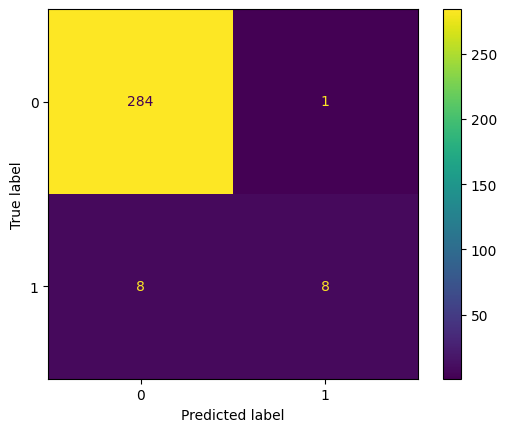

In [52]:
#Aquí se hizo una matriz de confusión para ver cómo es que el modelo clasifica los nuevos datos
matrix = confusion_matrix(Y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()


In [56]:
#Calculamos la sensibilidad, que representa la capacidad para identificar los que deben ser hospitalizados, y la especificidad, que representa los que no necesitan ser hospitalizados (se esperan valores altos para ambas variables)
sensibilidad = (8/(8+8))   #tp/tp+fn
print(f'La sensibilidad del modelo es de {sensibilidad}') 
especificidad = round(284/(284+1),3)  #tn/tn+fp
print(f'La especificidad del modelo es de {especificidad}')

La sensibilidad del modelo es de 0.5
La especificidad del modelo es de 0.996


## Conclusión

Se seleccionó un modelo de regresión logística basándose en la variable objetivo, dado que los posibles resultados son binarios, es decir, tiene dos valores posibles "SI" y "NO" para la columna de Hospitalización. Además, este tipo de modelos están diseñados para predecir la probabilidad de la ocurrencia de alguno de los dos eventos.

Para la evaluación del modelo, se utilizaron métricas tales como Accuracy_score, coeficientes, sensibilidad y precisión, validaciones cruzadas, especificidad y matriz de confusión, con el fin de revisar cada rendimiento posible del modelo.

Finalizamos en que el modelo tiene un mayor poder de clasificación para los que no deben ser hospitalizados, con una especificidad del 99%.
